In [81]:
# Imports
import torch
import torchvision
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.nn.init as init    # For weight initializations
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F  # All functions that don't have any parameters
from torch.utils.data import (
    DataLoader,
    # Dataset
)  # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets  # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
from tqdm import tqdm # For progress bars 
import matplotlib.pyplot as plt # For graphing  
import numpy as np  # For graphing  
import pandas as pd     # For data frames
import seaborn as sns   # For graphing

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 


In [82]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 12000
num_epoches = 5

In [83]:
# Get MNIST data
train_ds = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)

test_ds = datasets.MNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=False)

In [84]:
class StandardFeedforwardNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 392)
        self.Matrix2 = nn.Linear(392, 10)

        init.kaiming_uniform_(self.Matrix1.weight, mode="fan_in", nonlinearity="relu")
        init.kaiming_uniform_(self.Matrix2.weight, mode="fan_in", nonlinearity="relu")        

        self.R = nn.ReLU()

    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        return x.squeeze()

In [ ]:
# Check parameter matrix sizes
def print_parameter_info(model):
    for name, param in model.named_parameters():
        print(name)
        print(type(param), param.size())

In [85]:
# Train Network
def train_network(device, num_epoches, train_loader, model, criterion, optimizer):
    for epoch in range(num_epoches):
        losses = []

        for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
            # Get data to cuda if possible
            data = data.to(device=device)
            targets = targets.to(device=device)

            # forward
            scores = model(data)
            loss = criterion(scores, targets)

            losses.append(loss.item())
            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or adam step
            optimizer.step()

        # print(f"Cost at epoch {epoch} is {sum(losses)/len(losses):.5f}")

In [86]:
def check_accuracy(loader, model):
    if loader.dataset.train:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        accuracy = float(num_correct)/float(num_samples)
        print(f"Got {num_correct} / {num_samples} with accuracy {accuracy*100:.2f}%")

    model.train()
    return accuracy

In [87]:
def run_trials(num_trainings):
  # Define model, loss, and optimizer 
  model = StandardFeedforwardNetwork()
  print_parameter_info(model)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  
  acc_dict = {}
  acc_dict[0] = 0

  # Loop for number of tests
  for training in range(num_trainings):
    # Train network
    train_network(device, num_epoches, train_loader, model, criterion, optimizer)
    acc_dict[training + 1] = check_accuracy(test_loader, model)

    print(f"Row: {training + 1} | {list(acc_dict.values())}")

  # Plot graph of accuracies after the trial
  ypoints = np.array(list(acc_dict.values()))
  plt.xticks(np.arange(0, len(ypoints), 1.0))
  plt.xlabel("Number of trainings")
  plt.ylabel("Accuracy")
  plt.plot(ypoints)
  plt.show()

  return list(acc_dict.values())

--- NEW MODEL 0 --- 


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 7974 / 10000 with accuracy 79.74%
Row: 1 | [0, 0.7974]


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Checking accuracy on test data
Got 8889 / 10000 with accuracy 88.89%
Row: 2 | [0, 0.7974, 0.8889]


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 9147 / 10000 with accuracy 91.47%
Row: 3 | [0, 0.7974, 0.8889, 0.9147]


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 9287 / 10000 with accuracy 92.87%
Row: 4 | [0, 0.7974, 0.8889, 0.9147, 0.9287]


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 9373 / 10000 with accuracy 93.73%
Row: 5 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373]


100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


Checking accuracy on test data
Got 9448 / 10000 with accuracy 94.48%
Row: 6 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448]


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 9505 / 10000 with accuracy 95.05%
Row: 7 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505]


100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


Checking accuracy on test data
Got 9547 / 10000 with accuracy 95.47%
Row: 8 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547]


100%|██████████| 5/5 [00:07<00:00,  1.60s/it]


Checking accuracy on test data
Got 9587 / 10000 with accuracy 95.87%
Row: 9 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 9614 / 10000 with accuracy 96.14%
Row: 10 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614]


100%|██████████| 5/5 [00:07<00:00,  1.60s/it]


Checking accuracy on test data
Got 9638 / 10000 with accuracy 96.38%
Row: 11 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638]


100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


Checking accuracy on test data
Got 9663 / 10000 with accuracy 96.63%
Row: 12 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638, 0.9663]


100%|██████████| 5/5 [00:08<00:00,  1.60s/it]


Checking accuracy on test data
Got 9673 / 10000 with accuracy 96.73%
Row: 13 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638, 0.9663, 0.9673]


100%|██████████| 5/5 [00:07<00:00,  1.60s/it]


Checking accuracy on test data
Got 9685 / 10000 with accuracy 96.85%
Row: 14 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638, 0.9663, 0.9673, 0.9685]


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 9694 / 10000 with accuracy 96.94%
Row: 15 | [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638, 0.9663, 0.9673, 0.9685, 0.9694]


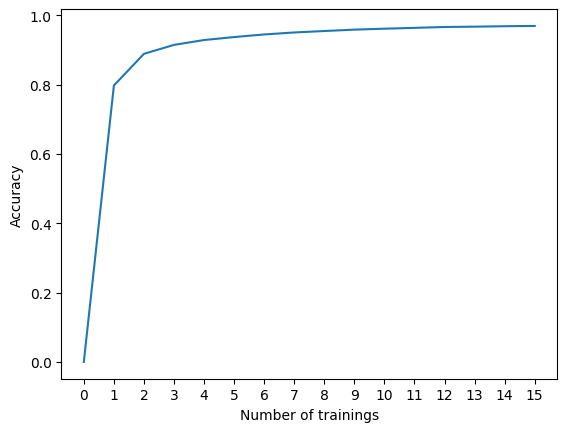

--- NEW MODEL 1 --- 


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 7973 / 10000 with accuracy 79.73%
Row: 1 | [0, 0.7973]


100%|██████████| 5/5 [00:08<00:00,  1.75s/it]


Checking accuracy on test data
Got 8356 / 10000 with accuracy 83.56%
Row: 2 | [0, 0.7973, 0.8356]


100%|██████████| 5/5 [00:08<00:00,  1.72s/it]


Checking accuracy on test data
Got 8472 / 10000 with accuracy 84.72%
Row: 3 | [0, 0.7973, 0.8356, 0.8472]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8548 / 10000 with accuracy 85.48%
Row: 4 | [0, 0.7973, 0.8356, 0.8472, 0.8548]


100%|██████████| 5/5 [00:07<00:00,  1.60s/it]


Checking accuracy on test data
Got 8626 / 10000 with accuracy 86.26%
Row: 5 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8671 / 10000 with accuracy 86.71%
Row: 6 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671]


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 8708 / 10000 with accuracy 87.08%
Row: 7 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8737 / 10000 with accuracy 87.37%
Row: 8 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8757 / 10000 with accuracy 87.57%
Row: 9 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8778 / 10000 with accuracy 87.78%
Row: 10 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8792 / 10000 with accuracy 87.92%
Row: 11 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8797 / 10000 with accuracy 87.97%
Row: 12 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792, 0.8797]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8810 / 10000 with accuracy 88.10%
Row: 13 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792, 0.8797, 0.881]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8822 / 10000 with accuracy 88.22%
Row: 14 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792, 0.8797, 0.881, 0.8822]


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 8824 / 10000 with accuracy 88.24%
Row: 15 | [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792, 0.8797, 0.881, 0.8822, 0.8824]


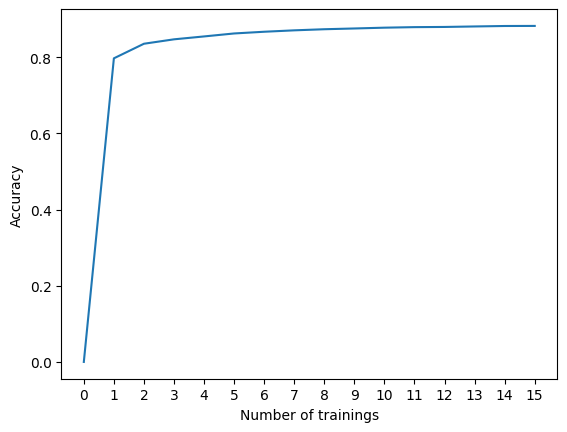

--- NEW MODEL 2 --- 


100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


Checking accuracy on test data
Got 8042 / 10000 with accuracy 80.42%
Row: 1 | [0, 0.8042]


100%|██████████| 5/5 [00:08<00:00,  1.66s/it]


Checking accuracy on test data
Got 8341 / 10000 with accuracy 83.41%
Row: 2 | [0, 0.8042, 0.8341]


100%|██████████| 5/5 [00:08<00:00,  1.70s/it]


Checking accuracy on test data
Got 8462 / 10000 with accuracy 84.62%
Row: 3 | [0, 0.8042, 0.8341, 0.8462]


100%|██████████| 5/5 [00:08<00:00,  1.69s/it]


Checking accuracy on test data
Got 8527 / 10000 with accuracy 85.27%
Row: 4 | [0, 0.8042, 0.8341, 0.8462, 0.8527]


100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


Checking accuracy on test data
Got 8581 / 10000 with accuracy 85.81%
Row: 5 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581]


100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


Checking accuracy on test data
Got 8626 / 10000 with accuracy 86.26%
Row: 6 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8660 / 10000 with accuracy 86.60%
Row: 7 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866]


100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


Checking accuracy on test data
Got 8685 / 10000 with accuracy 86.85%
Row: 8 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685]


100%|██████████| 5/5 [00:08<00:00,  1.62s/it]


Checking accuracy on test data
Got 8701 / 10000 with accuracy 87.01%
Row: 9 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701]


100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


Checking accuracy on test data
Got 8716 / 10000 with accuracy 87.16%
Row: 10 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716]


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Checking accuracy on test data
Got 8735 / 10000 with accuracy 87.35%
Row: 11 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735]


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Checking accuracy on test data
Got 8743 / 10000 with accuracy 87.43%
Row: 12 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735, 0.8743]


100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


Checking accuracy on test data
Got 8760 / 10000 with accuracy 87.60%
Row: 13 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735, 0.8743, 0.876]


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Checking accuracy on test data
Got 8763 / 10000 with accuracy 87.63%
Row: 14 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735, 0.8743, 0.876, 0.8763]


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Checking accuracy on test data
Got 8772 / 10000 with accuracy 87.72%
Row: 15 | [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735, 0.8743, 0.876, 0.8763, 0.8772]


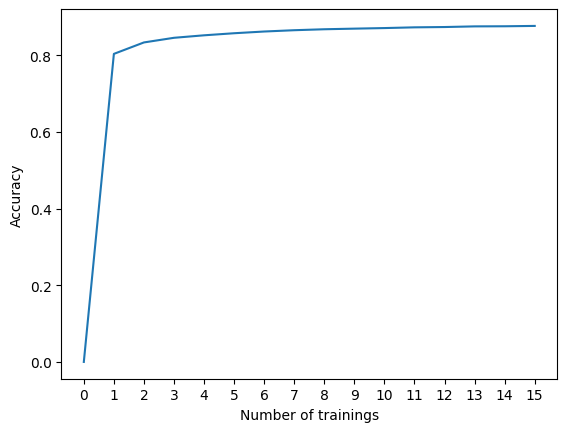

--- NEW MODEL 3 --- 


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 7465 / 10000 with accuracy 74.65%
Row: 1 | [0, 0.7465]


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Checking accuracy on test data
Got 7661 / 10000 with accuracy 76.61%
Row: 2 | [0, 0.7465, 0.7661]


100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


Checking accuracy on test data
Got 7718 / 10000 with accuracy 77.18%
Row: 3 | [0, 0.7465, 0.7661, 0.7718]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7772 / 10000 with accuracy 77.72%
Row: 4 | [0, 0.7465, 0.7661, 0.7718, 0.7772]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 7809 / 10000 with accuracy 78.09%
Row: 5 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7836 / 10000 with accuracy 78.36%
Row: 6 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836]


100%|██████████| 5/5 [00:07<00:00,  1.57s/it]


Checking accuracy on test data
Got 7868 / 10000 with accuracy 78.68%
Row: 7 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7887 / 10000 with accuracy 78.87%
Row: 8 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7911 / 10000 with accuracy 79.11%
Row: 9 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911]


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Checking accuracy on test data
Got 7921 / 10000 with accuracy 79.21%
Row: 10 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 7928 / 10000 with accuracy 79.28%
Row: 11 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7932 / 10000 with accuracy 79.32%
Row: 12 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928, 0.7932]


100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


Checking accuracy on test data
Got 7937 / 10000 with accuracy 79.37%
Row: 13 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928, 0.7932, 0.7937]


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Checking accuracy on test data
Got 7947 / 10000 with accuracy 79.47%
Row: 14 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928, 0.7932, 0.7937, 0.7947]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 7949 / 10000 with accuracy 79.49%
Row: 15 | [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928, 0.7932, 0.7937, 0.7947, 0.7949]


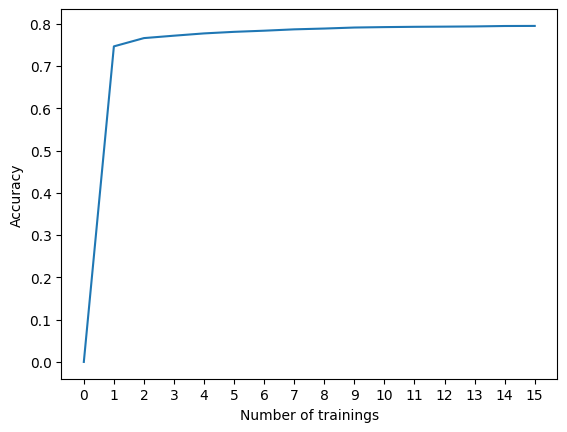

--- NEW MODEL 4 --- 


100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


Checking accuracy on test data
Got 8906 / 10000 with accuracy 89.06%
Row: 1 | [0, 0.8906]


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Checking accuracy on test data
Got 9240 / 10000 with accuracy 92.40%
Row: 2 | [0, 0.8906, 0.924]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 9382 / 10000 with accuracy 93.82%
Row: 3 | [0, 0.8906, 0.924, 0.9382]


100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Checking accuracy on test data
Got 9472 / 10000 with accuracy 94.72%
Row: 4 | [0, 0.8906, 0.924, 0.9382, 0.9472]


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Checking accuracy on test data
Got 9533 / 10000 with accuracy 95.33%
Row: 5 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533]


100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Checking accuracy on test data
Got 9579 / 10000 with accuracy 95.79%
Row: 6 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 9622 / 10000 with accuracy 96.22%
Row: 7 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622]


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Checking accuracy on test data
Got 9649 / 10000 with accuracy 96.49%
Row: 8 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 9664 / 10000 with accuracy 96.64%
Row: 9 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 9693 / 10000 with accuracy 96.93%
Row: 10 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693]


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Checking accuracy on test data
Got 9710 / 10000 with accuracy 97.10%
Row: 11 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971]


100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Checking accuracy on test data
Got 9718 / 10000 with accuracy 97.18%
Row: 12 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971, 0.9718]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 9733 / 10000 with accuracy 97.33%
Row: 13 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971, 0.9718, 0.9733]


100%|██████████| 5/5 [00:07<00:00,  1.54s/it]


Checking accuracy on test data
Got 9742 / 10000 with accuracy 97.42%
Row: 14 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971, 0.9718, 0.9733, 0.9742]


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Checking accuracy on test data
Got 9754 / 10000 with accuracy 97.54%
Row: 15 | [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971, 0.9718, 0.9733, 0.9742, 0.9754]


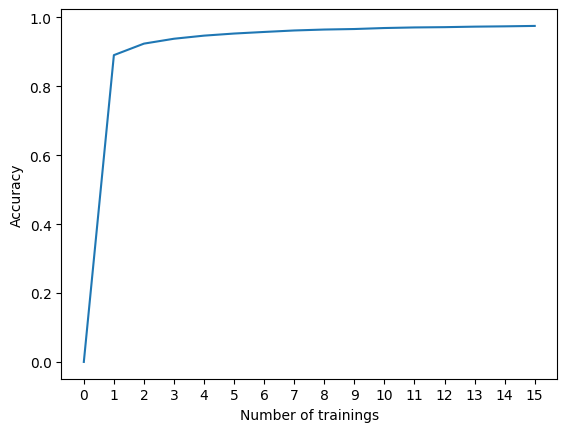

Test 0: [0, 0.7974, 0.8889, 0.9147, 0.9287, 0.9373, 0.9448, 0.9505, 0.9547, 0.9587, 0.9614, 0.9638, 0.9663, 0.9673, 0.9685, 0.9694]
Test 1: [0, 0.7973, 0.8356, 0.8472, 0.8548, 0.8626, 0.8671, 0.8708, 0.8737, 0.8757, 0.8778, 0.8792, 0.8797, 0.881, 0.8822, 0.8824]
Test 2: [0, 0.8042, 0.8341, 0.8462, 0.8527, 0.8581, 0.8626, 0.866, 0.8685, 0.8701, 0.8716, 0.8735, 0.8743, 0.876, 0.8763, 0.8772]
Test 3: [0, 0.7465, 0.7661, 0.7718, 0.7772, 0.7809, 0.7836, 0.7868, 0.7887, 0.7911, 0.7921, 0.7928, 0.7932, 0.7937, 0.7947, 0.7949]
Test 4: [0, 0.8906, 0.924, 0.9382, 0.9472, 0.9533, 0.9579, 0.9622, 0.9649, 0.9664, 0.9693, 0.971, 0.9718, 0.9733, 0.9742, 0.9754]


In [88]:
num_trainings = 15
acc_dict = {}
acc_dict[0] = 0

num_trials = 5

data = {}

# Loop through number of trials
for trial in range(num_trials):
  print(f"--- NEW MODEL {trial} --- ")
  data[trial] = run_trials(num_trainings)

# Print data after all runs
for i in range(num_trials):
  print(f"Test {i}: {data[i]}")


         0       1       2       3       4
0   0.0000  0.0000  0.0000  0.0000  0.0000
1   0.7974  0.7973  0.8042  0.7465  0.8906
2   0.8889  0.8356  0.8341  0.7661  0.9240
3   0.9147  0.8472  0.8462  0.7718  0.9382
4   0.9287  0.8548  0.8527  0.7772  0.9472
5   0.9373  0.8626  0.8581  0.7809  0.9533
6   0.9448  0.8671  0.8626  0.7836  0.9579
7   0.9505  0.8708  0.8660  0.7868  0.9622
8   0.9547  0.8737  0.8685  0.7887  0.9649
9   0.9587  0.8757  0.8701  0.7911  0.9664
10  0.9614  0.8778  0.8716  0.7921  0.9693
11  0.9638  0.8792  0.8735  0.7928  0.9710
12  0.9663  0.8797  0.8743  0.7932  0.9718
13  0.9673  0.8810  0.8760  0.7937  0.9733
14  0.9685  0.8822  0.8763  0.7947  0.9742
15  0.9694  0.8824  0.8772  0.7949  0.9754


<ErrorbarContainer object of 3 artists>

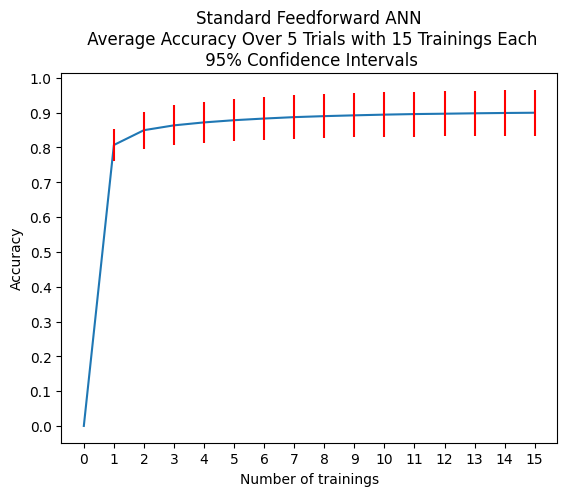

In [94]:
# Convert list of data over tests into a data frame
df = pd.DataFrame(data)
print(df)

x_values = list(range(len(df)))
trial_idx_list = list(range(num_trials))

ci_values = []
mean_values = df[trial_idx_list].mean(axis=1).tolist()

# Calculate confidence intervals for each training
for _, row in df[trial_idx_list].iterrows():
  mean = row.mean()
  sem = row.sem()
  ci = sem * 1.96  # 95% confidence interval
  ci_values.append(ci)

plt.title(f"Standard Feedforward ANN\n Average Accuracy Over {num_trials} Trials with {num_tests} Trainings Each\n 95% Confidence Intervals")
plt.xlabel("Number of trainings")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, num_trainings + 1, 1))
plt.yticks(np.arange(0, 1.1, 0.1))

sns.lineplot(x = x_values, y = mean_values)
plt.errorbar(x = x_values, y = mean_values, yerr=ci_values, linestyle='None', color='red')